---
## Linear Regression 
---

In [7]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [8]:
data = fetch_california_housing(as_frame=True)
df = data.frame

In [9]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [10]:
X, y = fetch_california_housing(return_X_y=True)
X.shape, y.shape

((20640, 8), (20640,))

In [12]:
# Set random seed
random_seed = 911

In [13]:
# Split data into 80-20 training testing sets 

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=random_seed)

print(f"X_train : shape {X_train.shape}")
print(f"X_test : shape {X_test.shape}")
print(f"y_train : shape {y_train.shape}")
print(f"y_test : shape {y_test.shape}")

X_train : shape (16512, 8)
X_test : shape (4128, 8)
y_train : shape (16512,)
y_test : shape (4128,)


In [20]:
# LinearRegressionV2
class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # SCALE FEATURES
        self.X_mean = np.mean(X, axis=0)
        self.X_std = np.std(X, axis=0)
        X = (X - self.X_mean) / self.X_std

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        X = (X - self.X_mean) / self.X_std
        return np.dot(X, self.weights) + self.bias

In [21]:
# Define mse error function
def mse(y_true, y_predicted):
    return np.mean((y_true-y_predicted) ** 2)

In [31]:
# Try predictions on model
regressor = LinearRegression(lr=0.01, n_iters=2000)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

# Print mse 
mse_vals = mse(y_test, predicted)
print(mse_vals)

0.521089690756855


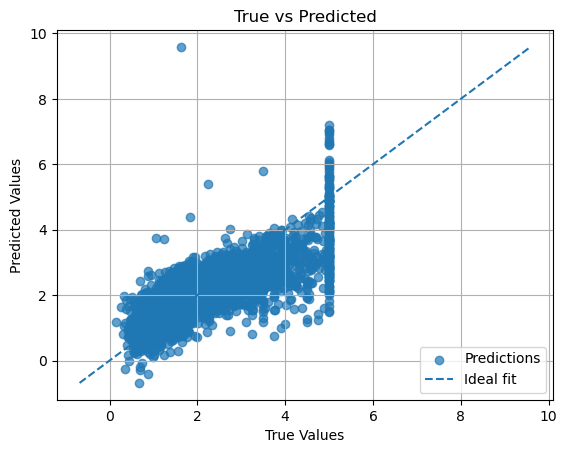

In [32]:
# Plot Predictions
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions(y_true, y_pred):
    plt.figure()
    
    plt.scatter(
        y_true, 
        y_pred, 
        alpha=0.7,
        label="Predictions"
    )
    
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    
    plt.plot(
        [min_val, max_val],
        [min_val, max_val],
        linestyle="--",
        label="Ideal fit"
    )
    
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("True vs Predicted")
    plt.legend()
    plt.grid(True)
    plt.show()


plot_predictions(y_test, predicted)